In [1]:
import cv2
import os
import skimage
from skimage import data
from skimage import transform
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf
from scipy import ndimage, misc
from skimage.transform import rotate
HEIGHT=28
WIDTH=28
CLASSNUMBER = 10
TRAIN_CLASS_NUMBER =55
TEST_CLASS_NUMBER=10
TRAIN_DATA_NUMBER = CLASSNUMBER * TRAIN_CLASS_NUMBER
TEST_DATA_NUMBER = CLASSNUMBER*TEST_CLASS_NUMBER
totalImages = 0
total_train_images=0
total_test_images=0

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#define number of images want to generate
H_IMAGES = 4
V_IMAGES = 4
S_IMAGES = 5
GAMMA_IMAGES = 10
ROTATE_IMAGES = 5
SHEAR_IMAGES = 5
TRANSLATION_IMAGES = 7
AFFINITIVIE_IMAGES = 10

In [3]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) if f.endswith(".jpg")]
        for f in file_names:
            
            images.append(skimage.data.imread(f))
            labels.append(str(d))
    return images, labels

In [4]:
ROOT_PATH = '/home/tang/mnistTransformation/'
train_data_directory = os.path.join(ROOT_PATH, "exp2/training")
test_data_directory = os.path.join(ROOT_PATH, "exp2/testing")

In [5]:
train_data_load_directory = os.path.join(ROOT_PATH,'exp2/pickForTrain')
test_data_load_directory = os.path.join(ROOT_PATH,'exp2/pickupForTest')



In [6]:
train_images,train_labels = load_data(train_data_load_directory)
test_images,test_labels = load_data(test_data_load_directory)


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

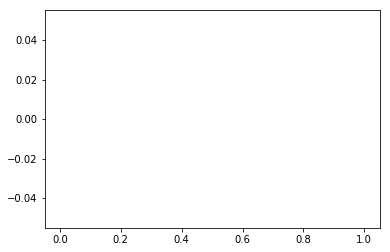

In [7]:
plt.hist(train_labels,10)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

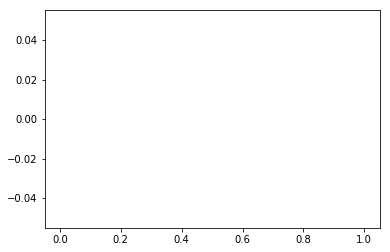

In [8]:
plt.hist(test_labels,10)

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data',one_hot = True)
mnistNoOnehot = input_data.read_data_sets('MNIST_data')

In [12]:
X_train = mnist.train.images*255
Y_train = mnist.train.labels
X_val = mnist.validation.images*255
Y_val = mnist.validation.labels
X_test = mnist.test.images*255
Y_test = mnist.test.labels


In [13]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(X_train)))
print("- Validation-set:\t{}".format(len(X_val)))
print("- Test-set:\t\t{}".format(len(X_test)))

Size of:
- Training-set:		55000
- Validation-set:	5000
- Test-set:		10000


In [14]:
X_train_reshape = np.reshape(X_train,(55000,28,28))
Y_train_reshape = mnistNoOnehot.train.labels
X_test_reshape = np.reshape(X_test,(10000,28,28))
Y_test_reshape = mnistNoOnehot.test.labels
X_val_reshape = np.reshape(X_val,(5000,28,28))
Y_val_reshape = mnistNoOnehot.validation.labels

In [15]:
##############sampling data for training
load_train_images = X_train_reshape
load_train_labels = Y_train_reshape

In [ ]:
count=0
for x in range(0,TRAIN_DATA_NUMBER):
    img = load_train_images[x]
    filename=train_data_load_directory+'/'+str(load_train_labels[x])+'/'+str(load_train_labels[x])+'-'+str(x)+'.jpg'
    plt.imsave(filename,img)
    print(filename)
    count+=1
    print('training images = '+str(count))



In [17]:
#################sampling data for testing
load_test_images = X_test_reshape
load_test_labels = Y_test_reshape
count=0
for x in range(0,TEST_DATA_NUMBER):
    img = load_test_images[x]
    filename=test_data_load_directory+'/'+str(load_test_labels[x])+'/'+str(load_test_labels[x])+'-'+str(x)+'.jpg'
    plt.imsave(filename,img)
    print(filename)
    count+=1
    print('testing images = '+str(count))



/home/tang/mnistTransformation/exp2/pickupForTest/7/7-0.jpg
testing images = 1
/home/tang/mnistTransformation/exp2/pickupForTest/2/2-1.jpg
testing images = 2
/home/tang/mnistTransformation/exp2/pickupForTest/1/1-2.jpg
testing images = 3
/home/tang/mnistTransformation/exp2/pickupForTest/0/0-3.jpg
testing images = 4
/home/tang/mnistTransformation/exp2/pickupForTest/4/4-4.jpg
testing images = 5
/home/tang/mnistTransformation/exp2/pickupForTest/1/1-5.jpg
testing images = 6
/home/tang/mnistTransformation/exp2/pickupForTest/4/4-6.jpg
testing images = 7
/home/tang/mnistTransformation/exp2/pickupForTest/9/9-7.jpg
testing images = 8
/home/tang/mnistTransformation/exp2/pickupForTest/5/5-8.jpg
testing images = 9
/home/tang/mnistTransformation/exp2/pickupForTest/9/9-9.jpg
testing images = 10
/home/tang/mnistTransformation/exp2/pickupForTest/0/0-10.jpg
testing images = 11
/home/tang/mnistTransformation/exp2/pickupForTest/6/6-11.jpg
testing images = 12
/home/tang/mnistTransformation/exp2/pickupForTe

In [31]:
pppimages,ppplabels = load_data(train_data_load_directory)
tttimages,tttlabels = load_data(test_data_load_directory)

In [35]:
len(tttlabels)

100

(array([15., 11., 14., 11., 14.,  7., 10.,  8.,  2.,  8.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

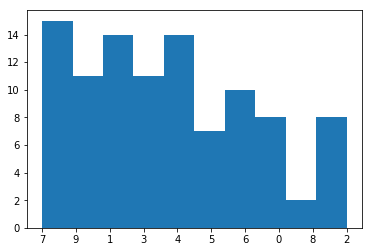

In [32]:
plt.hist(tttlabels,10)

(array([57., 56., 58., 62., 51., 40., 50., 68., 56., 52.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

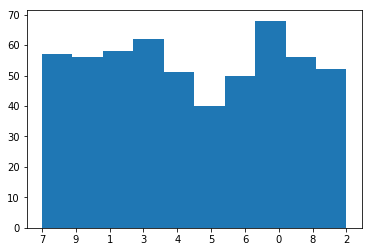

In [33]:
plt.hist(ppplabels,10)

In [18]:
len(train_images)

0

In [19]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
np.set_printoptions(threshold=np.inf)


In [20]:
len(train_images)

0

In [21]:
len(test_images)

0

In [22]:
train_images=load_train_images
train_labels = load_train_labels
test_images = load_test_images
test_labels = load_test_labels

(array([5444., 6179., 5470., 5638., 5307., 4987., 5417., 5715., 5389.,
        5454.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

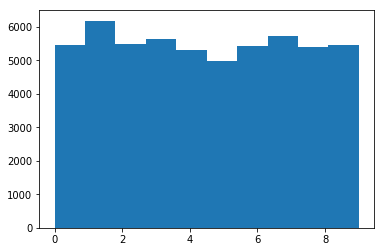

In [23]:
plt.hist(train_labels,10)

In [ ]:
#gamma_trans
#training
from skimage import data, exposure, img_as_float

i=0
for p in range(0,TRAIN_DATA_NUMBER):
    img = train_images[i]
    for j in range(0,GAMMA_IMAGES):#8 images with gamma
        random_factor = random.uniform(0,10)
        output_random_factor = str(int(random_factor*100))
        img_corrected = exposure.adjust_gamma(img,random_factor)
    
        filename=train_data_directory+'/'+str(train_labels[i])+'/'+ str(train_labels[i])+'_gamma_'+'_'+output_random_factor+'.jpg'
        plt.imsave(filename, img_corrected)
        total_train_images +=1
    print(filename)
    i+=1
print('train_images='+str(total_train_images))
#testing

i=0
for p in range(0,TEST_DATA_NUMBER):
    img = test_images[i]
    for j in range(0,GAMMA_IMAGES):#8 images with gamma
        random_factor = random.uniform(0,10)
        output_random_factor = str(int(random_factor*100))
        img_corrected = exposure.adjust_gamma(img,random_factor)
    
        filename=test_data_directory+'/'+str(test_labels[i])+'/'+ str(test_labels[i])+'_gamma_'+'_'+output_random_factor+'.jpg'
        plt.imsave(filename, img_corrected)
        total_test_images = 1 + total_test_images
    #print(filename)
    i+=1
print('test_images='+str(total_test_images))

In [25]:
#plt.imshow(iii)


In [ ]:
#rotation rotated 15 degree
#training
i=0

for p in range(0,TRAIN_DATA_NUMBER):
    img = train_images[i]
    
    for j in range(0,ROTATE_IMAGES):#max 45
        random_factor = random.uniform(-30,30)
        random_factor_output = str(int(random_factor*10))
        img_copy = img/255.0000
        
        img_rotated=rotate(img_copy,random_factor,resize=False)
        
        img_rotated15 = 255.0000*(img_rotated)
    
        filename=train_data_directory+'/'+str(train_labels[i])+'/'+str(train_labels[i])+'_rotate_'+'_'+random_factor_output+'.jpg'
        plt.imsave(filename, img_rotated15)
        total_train_images +=1
    print(filename)
    i+=1
print('train_images='+str(total_train_images))
print('###########################################################################################################################')
#testing
i=0

for p in range(0,TEST_DATA_NUMBER):
    img = test_images[i]
    
    for j in range(0,ROTATE_IMAGES):#max 45
        random_factor = random.uniform(-30,30)
        random_factor_output = str(int(random_factor*10))
        img_copy = img/255.0000
        
        img_rotated=rotate(img_copy,random_factor,resize=False)
        
        img_rotated15 = 255.0000*(img_rotated)
    
        filename=test_data_directory+'/'+str(test_labels[i])+'/'+str(test_labels[i])+'_rotate_'+'_'+random_factor_output+'.jpg'
        plt.imsave(filename, img_rotated15)
        total_test_images +=1
    print(filename)
    i+=1
print('test_images='+str(total_test_images))

In [ ]:
#translation
#training

from skimage import transform as transform
i=0
for p in range(0,TRAIN_DATA_NUMBER):
    img = train_images[i]/255.0000
    
    for j in range(0,TRANSLATION_IMAGES):#max 45
        random_H = random.uniform(-HEIGHT/2,HEIGHT/2)
        random_W = random.uniform(-WIDTH/2,WIDTH/2)
        tform = transform.SimilarityTransform(scale=1, rotation=0,
                               translation=(random_H, random_W))
        
        
        img_translationing=transform.warp(img,tform)
        img_translation = img_translationing*255.0000
        H_index = str(int(random_H))
        W_index = str(int(random_W))
        filename=train_data_directory+'/'+str(train_labels[i])+'/'+str(train_labels[i])+'_translation_'+'_'+H_index+'_'+W_index+'.jpg'
        plt.imsave(filename, img_translation)
        total_train_images +=1
    print(filename)
    i+=1
print('train_images='+str(total_train_images))
print('###########################################################################################################################')
#testing
i=0
for p in range(0,TEST_DATA_NUMBER):
    img = test_images[i]/255.0000
    
    for j in range(0,ROTATE_IMAGES):#max 45
        random_H = random.uniform(-HEIGHT/2,HEIGHT/2)
        random_W = random.uniform(-WIDTH/2,WIDTH/2)
        tform = transform.SimilarityTransform(scale=1, rotation=0,
                               translation=(random_H, random_W))       
        img_translationing=transform.warp(img,tform)
        img_translation = img_translationing*255.0000
        H_index = str(int(random_H))
        W_index = str(int(random_W))
        filename=test_data_directory+'/'+str(test_labels[i])+'/'+str(test_labels[i])+'_translation_'+'_'+H_index+'_'+W_index+'.jpg'
        plt.imsave(filename, img_translation)
        total_test_images+=1
    print(filename)
    i+=1
print('test_images='+str(total_test_images))

In [ ]:
#training
i=0
for p in range(0,TRAIN_DATA_NUMBER):
    img = train_images[i]/255.0000
    for j in range(0,SHEAR_IMAGES):#50 degree max
        random_factor = random.uniform(-1,1)
        random_factor_output = str(int(random_factor*100))
        tform = transform.AffineTransform(scale=(1.0, 1.0), rotation=0, shear=random_factor,
                        translation=(0, 0))
        img_shearing=transform.warp(img,tform)
        img_sheared = img_shearing*255.0000

        filename=train_data_directory+'/'+str(train_labels[i])+'/'+str(train_labels[i])+'_sheared_'+'_00'+random_factor_output+'.jpg'
        plt.imsave(filename, img_sheared)
        total_train_images+=1
    print(filename)
    #if img_sheared.shape!=(28,28,3):
        #print(img_sheared.shape)
    i+=1
print('train_images='+str(total_train_images))
#testing

i=0
for p in range(0,TEST_DATA_NUMBER):
    img = test_images[i]/255.0000
    for j in range(0,SHEAR_IMAGES):#50 degree max
        random_factor = random.uniform(-1,1)
        random_factor_output = str(int(random_factor*100))
        tform = transform.AffineTransform(scale=(1.0, 1.0), rotation=0, shear=random_factor,
                        translation=(0, 0))
        img_shearing=transform.warp(img,tform)
        img_sheared = img_shearing*255.0000

        filename=train_data_directory+'/'+str(test_labels[i])+'/'+str(test_labels[i])+'_sheared_'+'_00'+random_factor_output+'.jpg'
        plt.imsave(filename, img_sheared)
        total_test_images+=1
    print(filename)
    #if img_sheared.shape!=(28,28,3):
        #print(img_sheared.shape)
    i+=1
print('test_images='+str(total_test_images))

In [ ]:
#training
i=0
for p in range(0,TRAIN_DATA_NUMBER):
    img = train_images[i]/255.0000
    for j in range(0,AFFINITIVIE_IMAGES):#50 degree max
        scale_factor_h = random.uniform(-2,2)
        scale_factor_w = random.uniform(-2,2)
        rotation_factor = random.uniform(-30,30)
        shear_factor = random.uniform(-1,1)

        translation_factorH = random.uniform(-HEIGHT/2,HEIGHT/2)
        translation_factorW = random.uniform(-WIDTH/2,WIDTH/2)
        
        tform = transform.AffineTransform(scale=(scale_factor_h, scale_factor_w), rotation=rotation_factor, shear=shear_factor, translation=(translation_factorH, translation_factorW))
        img_affining=transform.warp(img,tform)
        img_affined = img_shearing*255.0000
        shear_index = str(int(shear_factor*100))
        sx = str(int(scale_factor_w))
        sy = str(int(scale_factor_h))
        rotation_index = str(int(random.uniform(-30,30)))
        th= str(int(translation_factorH))
        tw = str(int(translation_factorW))

        
    
    
        filename=train_data_directory+'/'+str(train_labels[i])+'/'+str(train_labels[i])+'_affined_shear'+shear_index+'_sx_'+sx+'_sy_'+sy+ '_r_'+rotation_index+'_th_'+th+'_tw_'+tw+'.jpg'
        plt.imsave(filename, img_affined)
        total_train_images+=1
    print(filename)
    #if img_sheared.shape!=(28,28,3):
        #print(img_sheared.shape)
    i+=1
print('train_images='+str(total_train_images))
#testing
i=0
for p in range(0,TEST_DATA_NUMBER):
    img = test_images[i]/255.0000
    for j in range(0,AFFINITIVIE_IMAGES):#50 degree max
        scale_factor_h = random.uniform(-2,2)
        scale_factor_w = random.uniform(-2,2)
        rotation_factor = random.uniform(-30,30)
        shear_factor = random.uniform(-1,1)

        translation_factorH = random.uniform(-HEIGHT/2,HEIGHT/2)
        translation_factorW = random.uniform(-WIDTH/2,WIDTH/2)
        
        tform = transform.AffineTransform(scale=(scale_factor_h, scale_factor_w), rotation=rotation_factor, shear=shear_factor, translation=(translation_factorH, translation_factorW))
        img_affining=transform.warp(img,tform)
        img_affined = img_shearing*255.0000
        shear_index = str(int(shear_factor*100))
        sx = str(int(scale_factor_w))
        sy = str(int(scale_factor_h))
        rotation_index = str(int(random.uniform(-30,30)))
        th= str(int(translation_factorH))
        tw = str(int(translation_factorW))

        
    
    
        filename=test_data_directory+'/'+str(test_labels[i])+'/'+str(test_labels[i])+'_affined_shear'+shear_index+'_sx_'+sx+'_sy_'+sy+ '_r_'+rotation_index+'_th_'+th+'_tw_'+tw+'.jpg'
        plt.imsave(filename, img_affined)
        total_test_images+=1
    print(filename)
    #if img_sheared.shape!=(28,28,3):
        #print(img_sheared.shape)
    i+=1
print('test_images='+str(total_test_images))

In [30]:
print(total_test_images)
print(total_train_images)

3500
20350


In [37]:
after_train_images,after_train_labels =load_data(train_data_directory)
after_test_images,after_test_labels =load_data(test_data_directory)

(array([1703., 1678., 1732., 1810., 1558., 1282., 1509., 1960., 1667.,
        1578.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

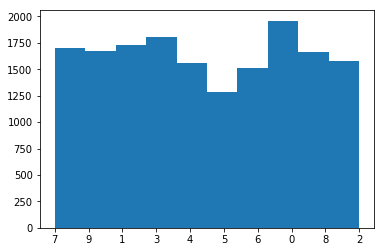

In [39]:
plt.hist(after_train_labels,10)

In [40]:
len(after_train_labels)

16477

In [41]:
len(after_test_labels)

2921